Decision Tree

Tiatnic Survival Dataset

In [2]:
#Import the Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [3]:
#Load the data sets- train and test
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
#Look at top values of train data 
print(df.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

In [6]:
#Print the column names of train data
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [7]:
columns_list = df.columns.tolist()
print(columns_list)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [8]:
#Print the dimension of train and test data
print("Train Data Dimensions:",df.shape)


Train Data Dimensions: (891, 12)


In [9]:
#Print the number of missing values in each column of train and test data
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## Data Visualization

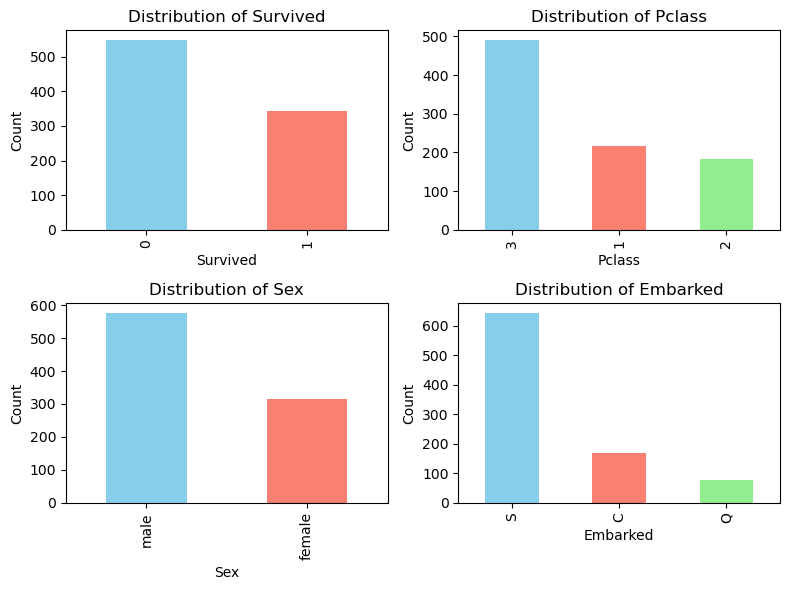

In [10]:
#Barchart of Survived, Pclass, Sex, Embarked
columns = ["Survived", "Pclass", "Sex", "Embarked"]

plt.figure(figsize=(8, 6))

for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    df[col].value_counts().plot(kind="bar", color=['skyblue', 'salmon', 'lightgreen'])
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


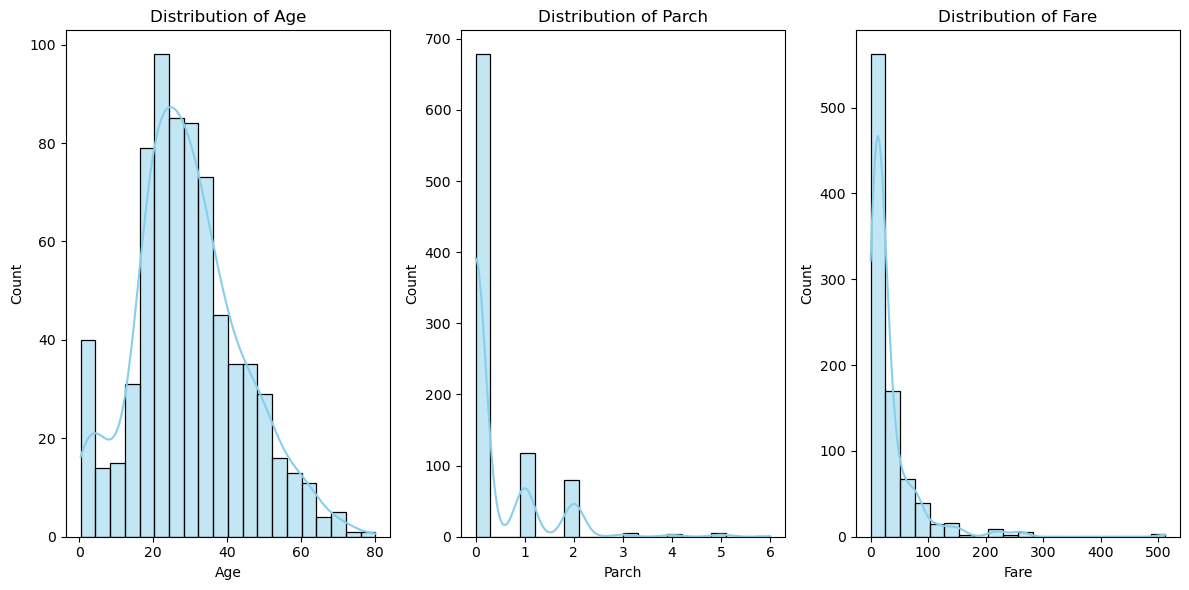

In [11]:
#Histogram of Age, Parch, Fare
columns = ["Age", "Parch", "Fare"]

plt.figure(figsize=(12, 6))

for i, col in enumerate(columns, 1):
    plt.subplot(1, 3, i) 
    sns.histplot(df[col], bins=20, kde=True, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


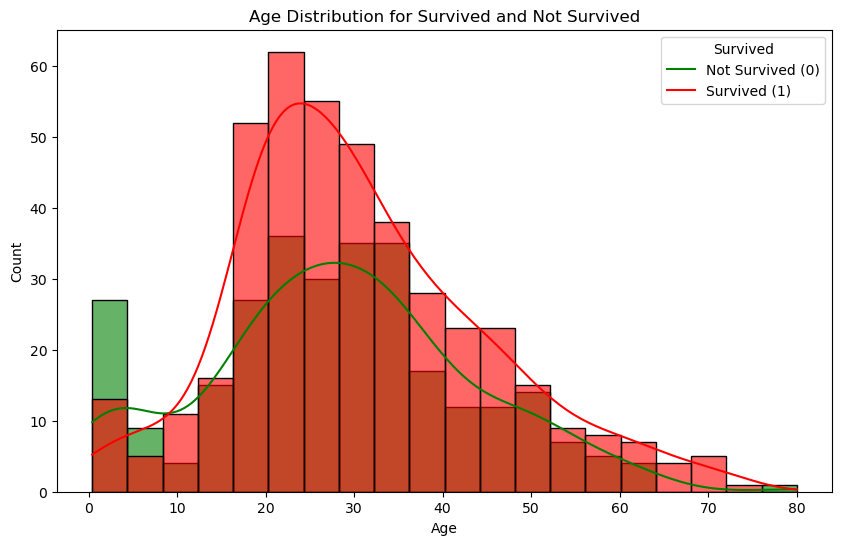

In [12]:
#Plot histogram of age for survived and did not survived class

plt.figure(figsize=(10, 6))

sns.histplot(data=df, x="Age", hue="Survived", bins=20, kde=True, palette=["red", "green"], alpha=0.6)

plt.title("Age Distribution for Survived and Not Survived")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["Not Survived (0)", "Survived (1)"])

plt.show()

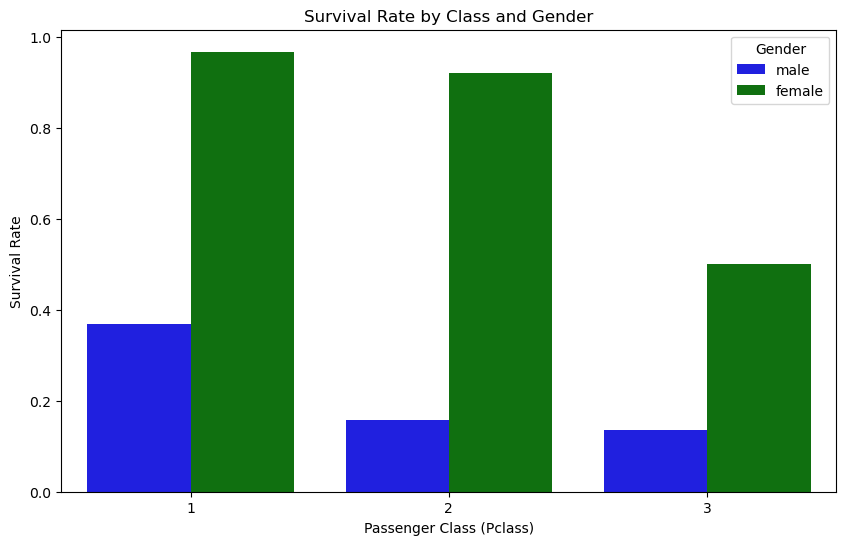

In [13]:
#Count class and geder wise survival rate - plot with appropriate chart


plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Pclass", y="Survived", hue="Sex", errorbar=None, palette=["blue", "green"])

# Labels and title
plt.title("Survival Rate by Class and Gender")
plt.xlabel("Passenger Class (Pclass)")
plt.ylabel("Survival Rate")
plt.legend(title="Gender")

# Show plot
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


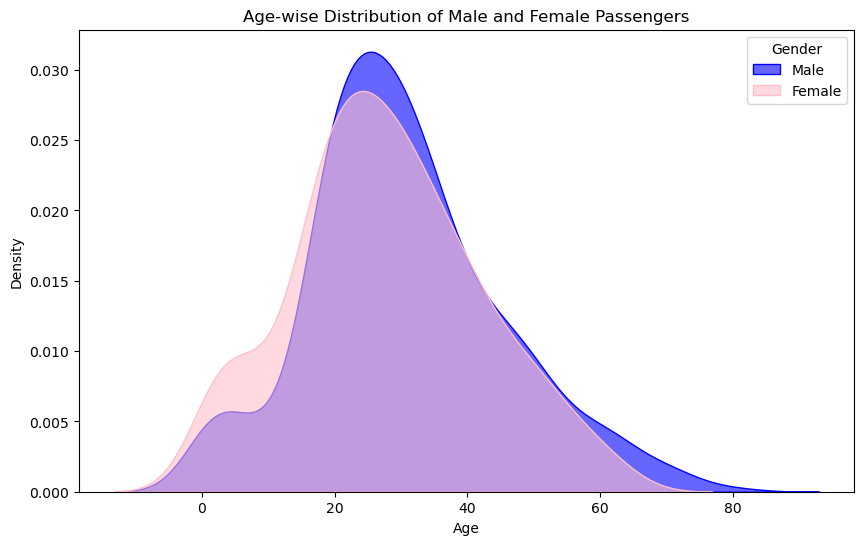

In [14]:
#Age wise Distribution of Male and Female passengers

plt.figure(figsize=(10, 6))

sns.kdeplot(df[df["Sex"] == "male"]["Age"], label="Male", fill=True, color="blue", alpha=0.6)
sns.kdeplot(df[df["Sex"] == "female"]["Age"], label="Female", fill=True, color="pink", alpha=0.6)

plt.title("Age-wise Distribution of Male and Female Passengers")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend(title="Gender")

plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


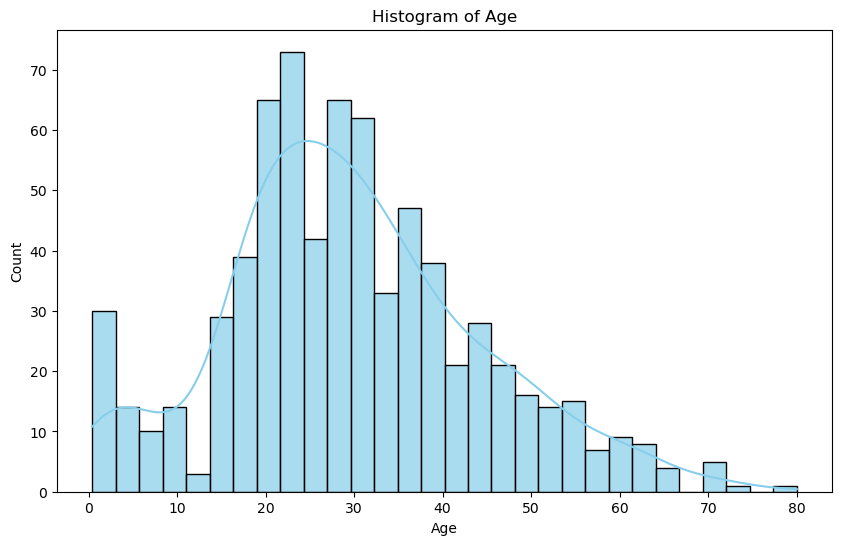

In [15]:

plt.figure(figsize=(10, 6))
sns.histplot(df["Age"], bins=30, kde=True, color="skyblue", alpha=0.7)

plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Count")

plt.show()

## Handling Missing Values

In [16]:
#Replace the msiing values in Embarked column by 'S'
import pandas as pd

df = pd.read_csv("train.csv")
df["Embarked"].fillna("S", inplace=True)

print(df["Embarked"].isnull().sum())

0


In [17]:
#Impute the missing values in Fare column with median value

fare_median = df["Fare"].median()

df["Fare"].fillna(fare_median, inplace=True)

print(df["Fare"].isnull().sum())

0


In [18]:
#Impute the Age column. It has too many missing values but it may be important. 
#We fill the missing values with numbers randomly drawn from distribution
#that has same mean and standard deviation as non missing Age data

age_mean = df["Age"].mean()
age_std = df["Age"].std()

num_missing = df["Age"].isnull().sum()

random_ages = np.random.normal(loc=age_mean, scale=age_std, size=num_missing)

df.loc[df["Age"].isnull(), "Age"] = random_ages

print(df["Age"].isnull().sum())  

0


## Feature Engineering - Creating new features

In [19]:
# Create and add a new feature FamilySize as a combination of SibSp and Parch
#FamilySize = Parch + SibSp + 1

df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

print(df[["SibSp", "Parch", "FamilySize"]].head())
df

   SibSp  Parch  FamilySize
0      1      0           2
1      1      0           2
2      0      0           1
3      1      0           2
4      0      0           1


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-0.003438,1,2,W./C. 6607,23.4500,NaN,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1


In [20]:
# Create new feature IsAlone from FamilySize
#If FamilySize == 1 then IsAlone = True else IsAlone = False

df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

df["IsAlone"] = df["FamilySize"] == 1

print(df[["FamilySize", "IsAlone"]].head())

   FamilySize  IsAlone
0           2    False
1           2    False
2           1     True
3           2    False
4           1     True


## Create a new attribute Has_cabin using the attribue Cabin. 



In [21]:
#if Cabin == NaN the Has_cabin = False else Has_cabin = True

df["Has_cabin"] = df["Cabin"].notna()

print(df[["Cabin", "Has_cabin"]].head(10))

  Cabin  Has_cabin
0   NaN      False
1   C85       True
2   NaN      False
3  C123       True
4   NaN      False
5   NaN      False
6   E46       True
7   NaN      False
8   NaN      False
9   NaN      False


In [22]:

#Drop the columns which may not be useful in prediction of survival
#Drop PassengerId, Name, Ticket, and Cabin

df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

print(df.head())
print(df.columns)


   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  FamilySize  \
0         0       3    male  22.0      1      0   7.2500        S           2   
1         1       1  female  38.0      1      0  71.2833        C           2   
2         1       3  female  26.0      0      0   7.9250        S           1   
3         1       1  female  35.0      1      0  53.1000        S           2   
4         0       3    male  35.0      0      0   8.0500        S           1   

   IsAlone  Has_cabin  
0    False      False  
1    False       True  
2     True      False  
3    False       True  
4     True      False  
Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'FamilySize', 'IsAlone', 'Has_cabin'],
      dtype='object')


## Model Building

In [23]:
#Prepare X and y

X = df.drop(columns=["Survived"])
y = df["Survived"]

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (891, 10)
Shape of y: (891,)


In [24]:
# Label encoding of categorical features

encoder = LabelEncoder()
categorical_cols = ["Sex", "Embarked", "Has_cabin", "IsAlone"]

for col in categorical_cols:
    X[col] = encoder.fit_transform(X[col]) 

print(X.head())

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  FamilySize  IsAlone  \
0       3    1  22.0      1      0   7.2500         2           2        0   
1       1    0  38.0      1      0  71.2833         0           2        0   
2       3    0  26.0      0      0   7.9250         2           1        1   
3       1    0  35.0      1      0  53.1000         2           2        0   
4       3    1  35.0      0      0   8.0500         2           1        1   

   Has_cabin  
0          0  
1          1  
2          0  
3          1  
4          0  


In [25]:
# concat df_categorical with original df

categorical_cols = ["Sex", "Embarked", "Has_cabin", "IsAlone"]
df_categorical = df[categorical_cols].apply(LabelEncoder().fit_transform)

df_numeric = df.drop(columns=categorical_cols) 
df_final = pd.concat([df_numeric, df_categorical], axis=1) 

print(df_final.head())

   Survived  Pclass   Age  SibSp  Parch     Fare  FamilySize  Sex  Embarked  \
0         0       3  22.0      1      0   7.2500           2    1         2   
1         1       1  38.0      1      0  71.2833           2    0         0   
2         1       3  26.0      0      0   7.9250           1    0         2   
3         1       1  35.0      1      0  53.1000           2    0         2   
4         0       3  35.0      0      0   8.0500           1    1         2   

   Has_cabin  IsAlone  
0          0        0  
1          1        0  
2          0        1  
3          1        0  
4          0        1  


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

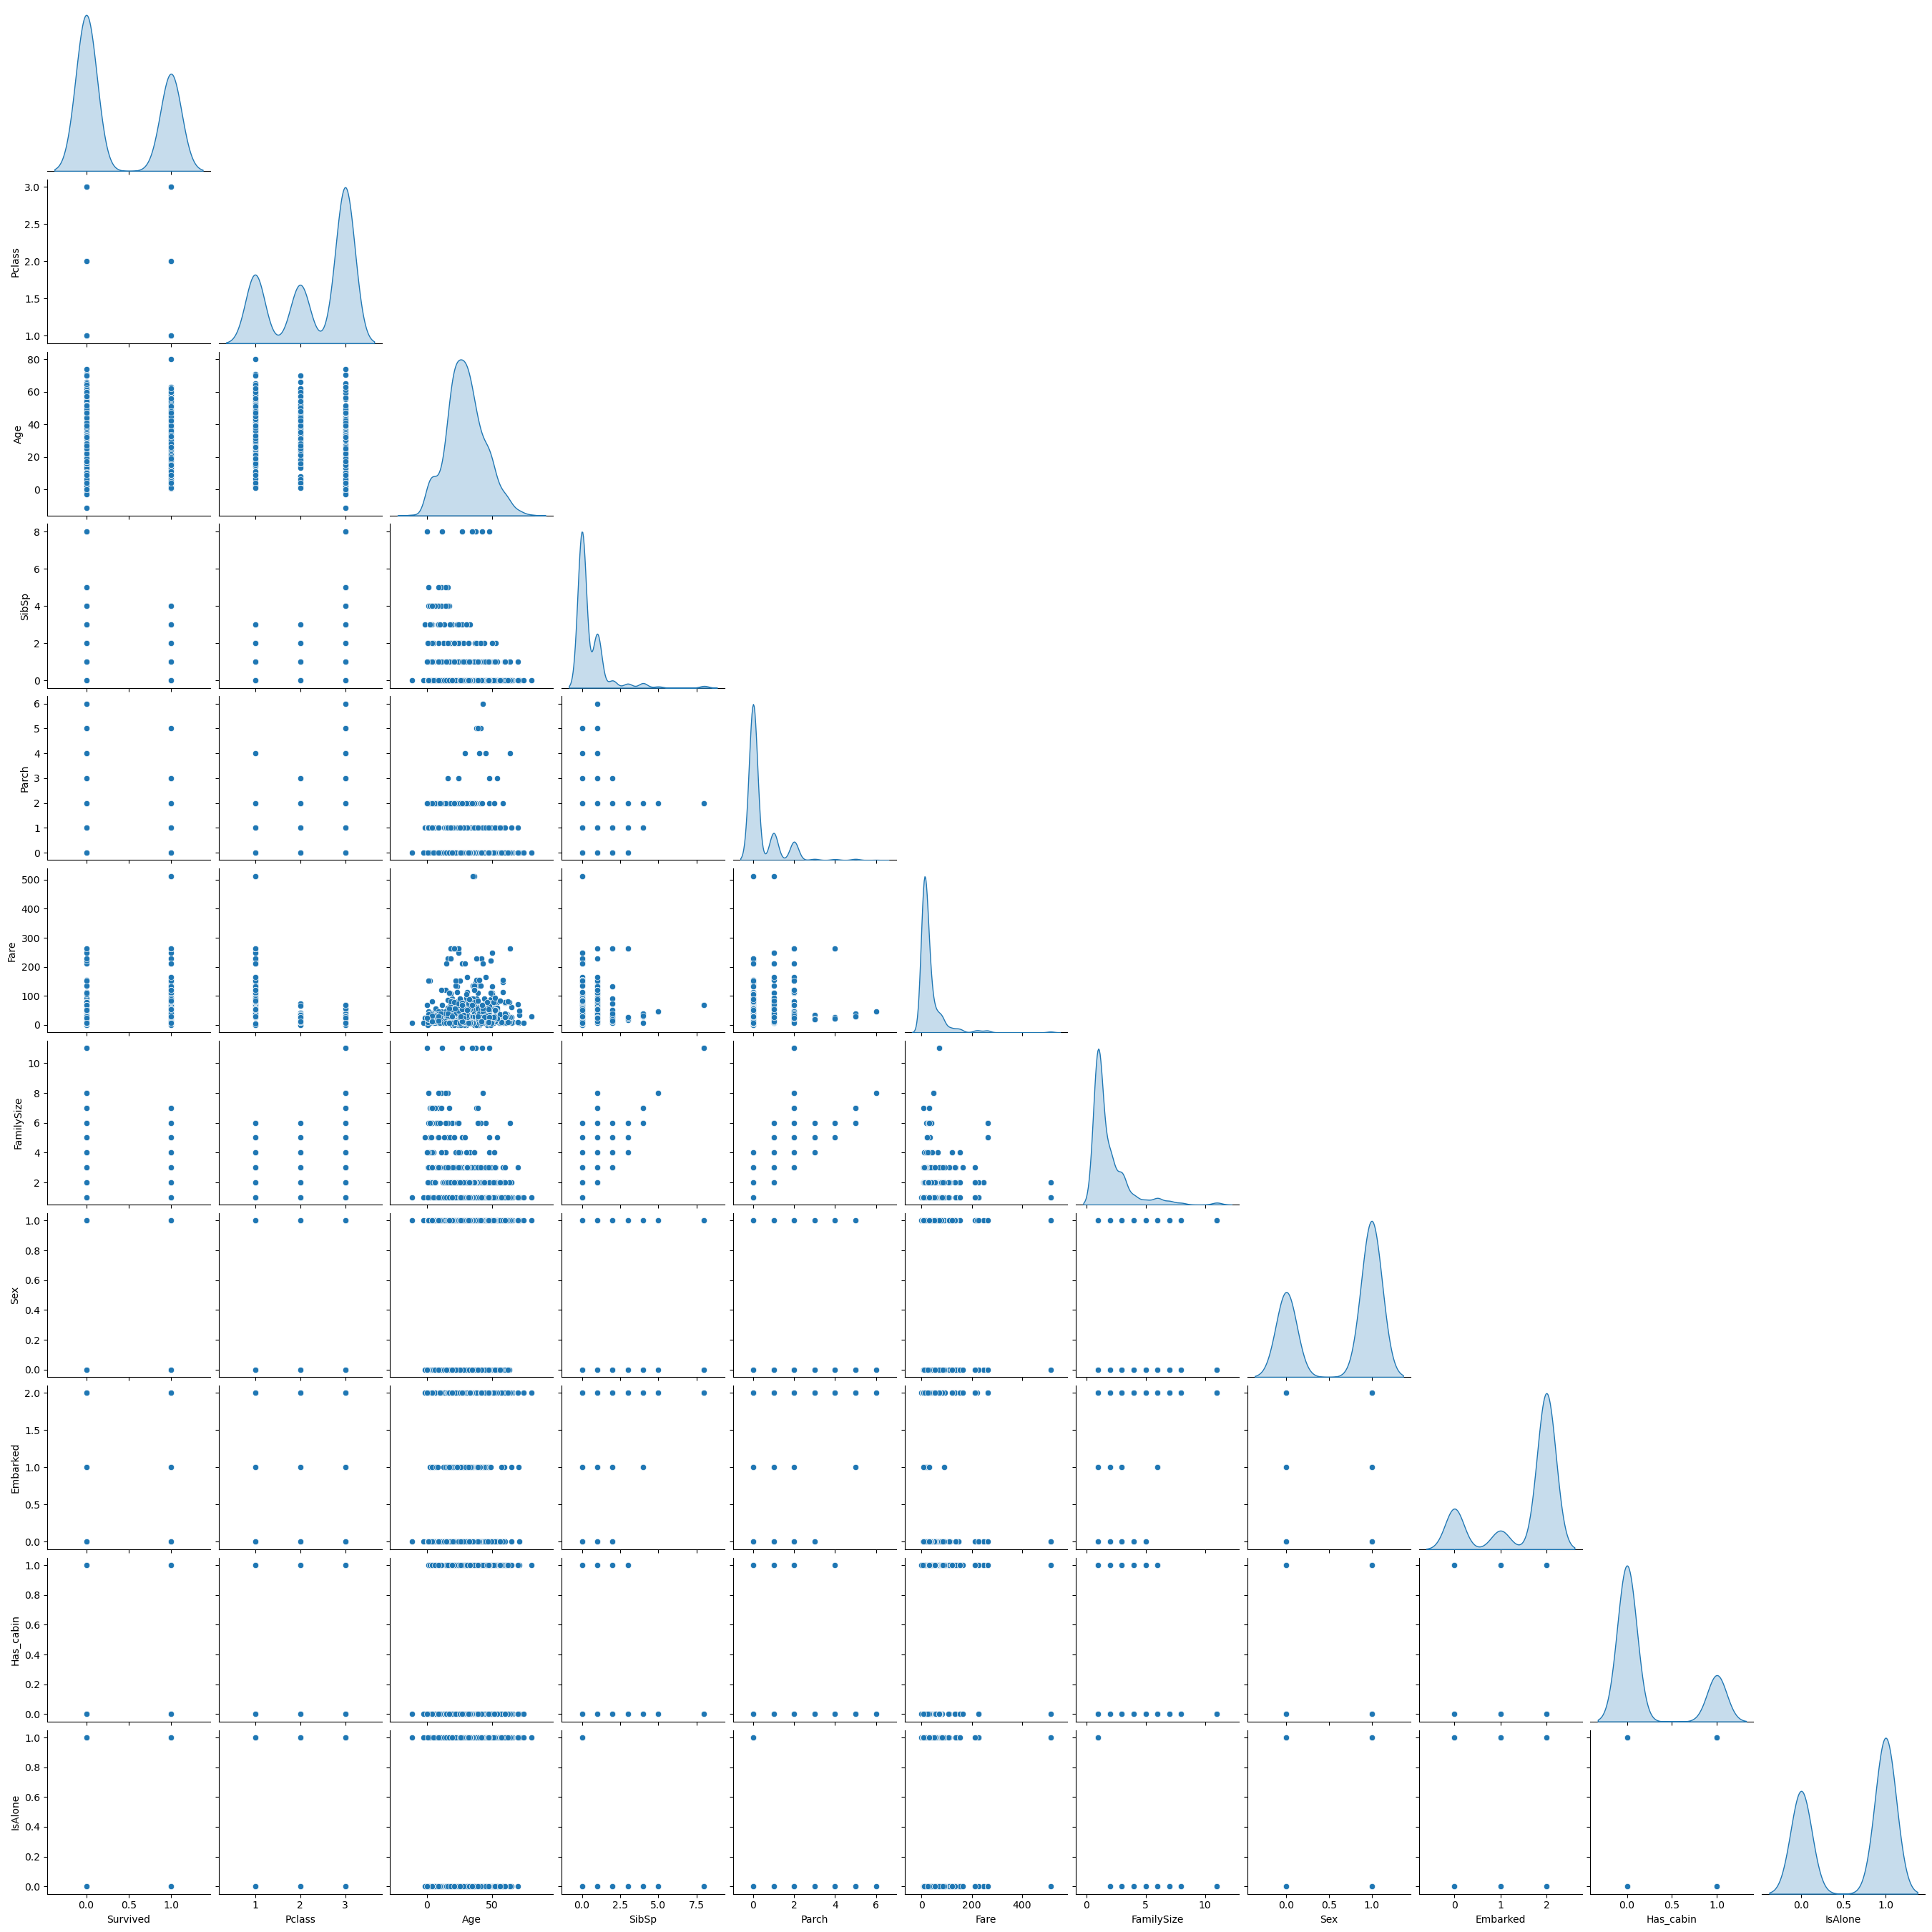

In [26]:
#Do a pairplot of all features


sns.pairplot(df_final, diag_kind="kde", corner=True)
plt.show()


In [27]:
# Splitting the data into train and validation set - 90% train 10% validation
#X_train, X_test, y_train, y_validation

X_train, X_validation, y_train, y_validation = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

print(f"X_train shape: {X_train.shape}")
print(f"X_validation shape: {X_validation.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_validation shape: {y_validation.shape}")

X_train shape: (801, 10)
X_validation shape: (90, 10)
y_train shape: (801,)
y_validation shape: (90,)


In [28]:
# Create the model
# Fitting the decision tree with default hyperparameters
# Importing decision tree classifier from sklearn library


model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_validation)

accuracy = accuracy_score(y_validation, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")


Validation Accuracy: 0.7889


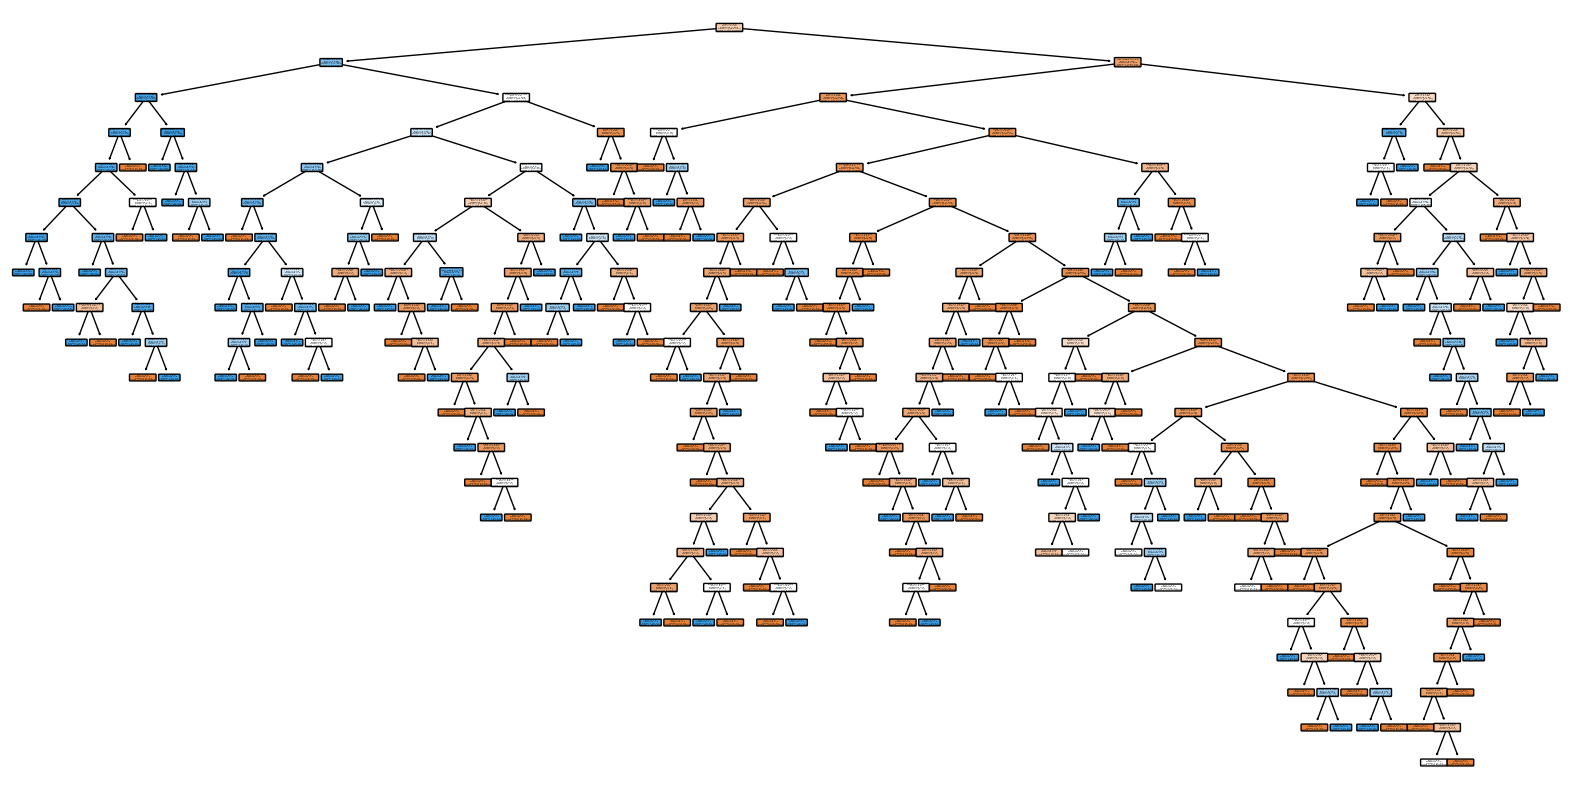

In [29]:
#Print the tree

# Importing required packages for visualization

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

plot_tree(model, feature_names=X_train.columns, class_names=["Not Survived", "Survived"], filled=True, rounded=True)

plt.show()


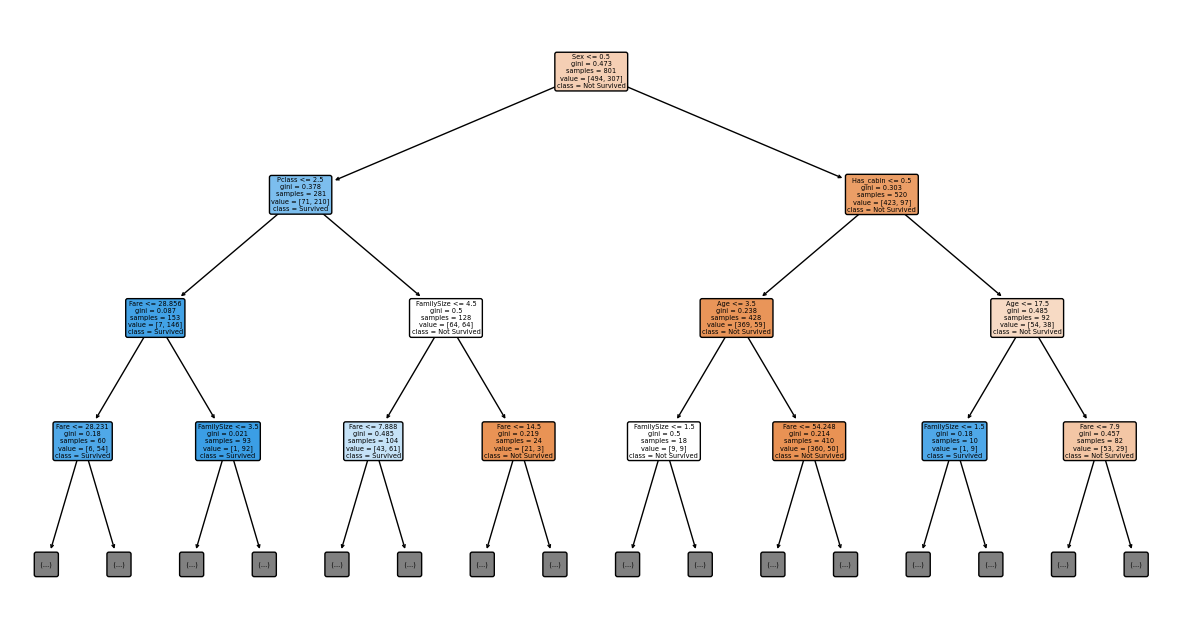

In [30]:
# plotting tree with max_depth=3


plt.figure(figsize=(15, 8))

plot_tree(model, feature_names=X_train.columns, class_names=["Not Survived", "Survived"], 
          filled=True, rounded=True, max_depth=3)

plt.show()


In [31]:
# Ensure X and y exist
print("X columns:", X.columns)
print("y unique values:", y.unique())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X columns: Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'FamilySize', 'IsAlone', 'Has_cabin'],
      dtype='object')
y unique values: [0 1]
X_train shape: (801, 10)
X_test shape: (90, 10)


<img src="tree2.png">

In [32]:
# Check the evaluation metrics of our default model on validation set - Confusion Matrix, Accuracy, Precision, Recall, F1 score

# Importing classification report and confusion matrix from sklearn metrics

# Making predictions

# Printing classification report

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAccuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[43 11]
 [ 8 28]]

Accuracy: 0.7888888888888889

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        54
           1       0.72      0.78      0.75        36

    accuracy                           0.79        90
   macro avg       0.78      0.79      0.78        90
weighted avg       0.79      0.79      0.79        90



In [33]:
# Printing confusion matrix and accuracy

from sklearn.metrics import confusion_matrix, accuracy_score

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")


Confusion Matrix:
[[43 11]
 [ 8 28]]

Accuracy: 0.79
